# `DSML_WS_11` - Decision Trees

Please work on the following task **before** the eleventh workshop session.

## 1. Classifying breast cancer cells

In workshop 10, we looked at the workings of relevant classification algorithms. One issue which we did not consider was that we have trained our algorithms on the full set of available data. While this is fine for understanding how classification works in general, it is not suitable for developing predictive models (as you know by now).

As a result, the classification metrics from last week's workshop are relatively meaningless as we need to evaluate on previously unseen data. 

**Design a proper model development routine to train a high-performing classification algorithm for the breast cancer dataset. Proceed as follows:**

- Define your feature (let's continue to focus on `area_mean` and `concave points_mean`) and target sets.
- Partition the data into training, validation and test set, and scale the input features.
- Train a support vector machine on the training set.
- Tweak hyperparameters (e.g., kernel) by validating on the validation set.
- Report test metrics from the unseen test set (only look at the test set once you are finished validating your model. Do not go back and forth as this would create leakage!).

In [11]:
# your code here
import pandas as pd

# Load your dataset
df = pd.read_csv("breast_cancer.csv")

# Define features and target
X = df[['area_mean', 'concave points_mean']]
y = df['diagnosis'].map({'M': 1, 'B': 0})  # Encode target: M = malignant = 1, B = benign = 0
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
val_preds = svm.predict(X_val_scaled)
print("Validation Metrics (Linear SVM): \n")
print(classification_report(y_val, val_preds))

from sklearn.model_selection import GridSearchCV

# Define grid of hyperparameters
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(random_state=42), param_grid, scoring='accuracy', cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:\n", grid.best_params_)


# Use best model to predict on unseen test data
final_model = grid.best_estimator_
test_preds = final_model.predict(X_test_scaled)

print("Final Test Metrics:\n")
print(classification_report(y_test, test_preds))




Validation Metrics (Linear SVM): 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        70
           1       0.91      0.91      0.91        44

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Best Parameters:
 {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Final Test Metrics:

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        71
           1       0.86      0.88      0.87        43

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



## 2. Decision Trees for regression: Peak electricity demand example (Repetiton)

Revisit the tree-based regression introduced in ``Workshop 8``. In that session, we used a tree-based model to predict peak electricity demand based on temperature, splitting the data into training and testing sets. We also identified the optimal tree depth using a simple grid search over various tree depths. 

Instead of solely plotting the predicted regression line across all data in a scatterplot, we can also visually illustrate the model's desicion process using a tree diagram. This can be easily achieved with the ``plot_tree`` function from the ``sklearn.tree`` library.
Let's look at a very simple tree architecture for the prediciton of peak electricity demand - to do this, proceed as follows:

In [12]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

**Step 1:** Load the ``Pittsburgh_load_data.csv`` dataset and specify the input vectors for your model:
- *Peak electricity demand* (``MAX``) as the prediction target
- *High temperature* (``High_temp``) as the predictor

In [15]:
# your code here
pitt = pd.read_csv("Pittsburgh_load_data.csv")
X = pitt[['High_temp']]
Y = pitt[['MAX']]


**Step 2:** Use the ``DesicisonTreeRegressor`` to fit a decision tree of max_depth = 2 to your data and plot the results in a scatterplot. Name the model *tree_model*.

***Note:** For demonstration purposes, skip the training, validation and test splits, that would normally be required for prediction (as done in the first task). Our goal in this introductory setting is simply to get started with the visualization of tree diagrams and their interpretation.*

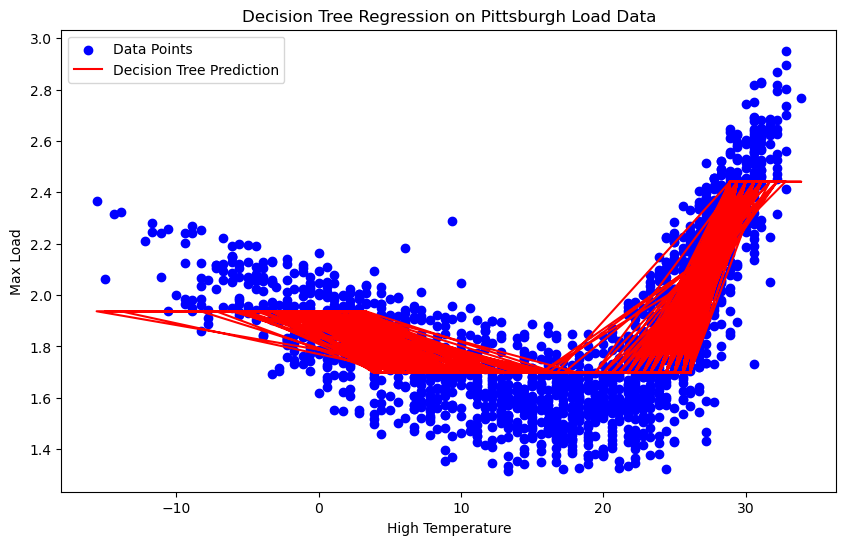

In [19]:
# your code here
import matplotlib.pyplot as plt

tree_model = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_model.fit(X, Y)

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, tree_model.predict(X), color='red', label='Decision Tree Prediction')
plt.xlabel('High Temperature')
plt.ylabel('Max Load')
plt.title('Decision Tree Regression on Pittsburgh Load Data')
plt.legend()
plt.show()




**Step 3:** Visualize the tree diagram, by utilizing the ``plot_tree`` function.

Start by initializing a figure with ``plt.figsize = (12,6)``, then use ``plot_tree(tree_model, feature_names=['High Temperature'])``.
- Can you interpret the values that are depicted in the graphical representation of the tree?
- How would you traverse the tree to predict peak electricity demand of a day with a high temperature of 30°C?

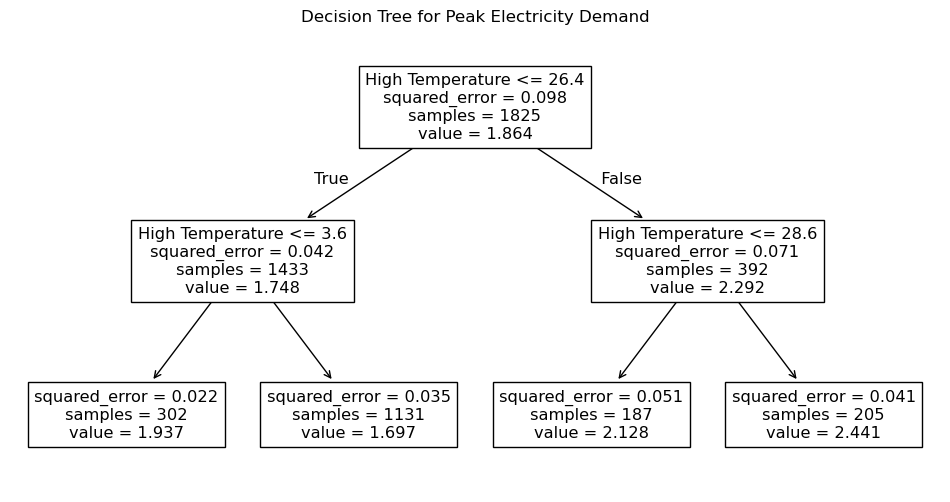

In [20]:
# your code here
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(tree_model, feature_names=['High Temperature'])
plt.title("Decision Tree for Peak Electricity Demand")
plt.show()